<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/Basic_Deep_Learning_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing tensorflow
!pip install tensorflow


In [2]:
# Importing important libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# Importing the data
df = pd.read_csv('/content/bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
'''
age: The age of the customer. (Numerical)
job: The occupation/employment status of the customer. (Categorical)
marital: The marital status of the customer. (Categorical)
education: The education level attained by the customer. (Categorical)
default: Whether the customer has credit in default or not. (Categorical)
balance: The balance in the customer's account. (Numerical)
housing: Whether the customer has a housing loan or not. (Categorical)
contact: Type of communication used to contact customers (phone, cellular, etc.). (Categorical)
day: Day of the month when customers were last contacted. (Numerical)
duration: Duration (in seconds) of the current visit.
pdays: The number of days passed by after contact from the previous campaign. (Numerical)
duration: Duration (in seconds) of the last contact with customers during the previous campaign. (Numerical)
poutcome: Outcome from the previous marketing campaign. (Categorical)
job: The occupation/employment status of the customer. (Categorical)
'''

In [5]:
# Dropping the  'duration' column
df.drop('duration', axis=1, inplace=True)

In [6]:
# Getting an idea about the proportion of values in the target variable
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
# We have equal amount of data  from class 0 and 1.

In [8]:
# Encoding the target variable
df['deposit'] = df['deposit'].map ({'yes': 1, 'no': 0})

In [9]:
# Separating  input features and target variable
x = df.drop('deposit', axis=1)
y = df['deposit']

In [11]:
# Encode the categorical  columns using pd.get_dummies()
categorical_cols = x.select_dtypes(include=['object']).columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

In [12]:
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)


In [27]:
# Build the Deep learning Model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compiling the Model
model.compile(loss='binary_crossentropy', optimizer= 'SGD', metrics=['accuracy'])

In [ ]:
'''
Compiling the model -> setting the strategy for learning
1) Loss Function: Binary Crossentropy is used for binary classification problems.This gives idea about the error in the model.
2) Optimizer: SGD (Stochastic Gradient Descent) is used as the optimizer. Controls how model learns by adjusting the weights during the backward proppogation.
3) Metrics: Accuracy is used as the evaluation metric.
'''

In [29]:
# training the Model
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5082 - loss: 193.0465 - val_accuracy: 0.5442 - val_loss: 0.6985
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5251 - loss: 0.6922 - val_accuracy: 0.5286 - val_loss: 0.6959
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5198 - loss: 0.6906 - val_accuracy: 0.5420 - val_loss: 0.6889
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5309 - loss: 0.6868 - val_accuracy: 0.5409 - val_loss: 0.6880
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5279 - loss: 0.6880 - val_accuracy: 0.5353 - val_loss: 0.6886
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5259 - loss: 0.6858 - val_accuracy: 0.5454 - val_loss: 0.6859
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5235 - loss: 0.6861 - val_accuracy: 0.5375 - val_loss: 0.6884
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5360 - loss: 0.6867 - val_accuracy: 

In [ ]:
'''
Training Accuracy -> 53%
Validation Accuracy -> 54%

Training and validation performance are within 5% of each other.
Also, both the performance  values are above 50%.

'''

In [31]:
# Evaluate the model on testing dataset
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5351 - loss: 0.6853
Test Loss: 0.6868, Test Accuracy: 0.5244


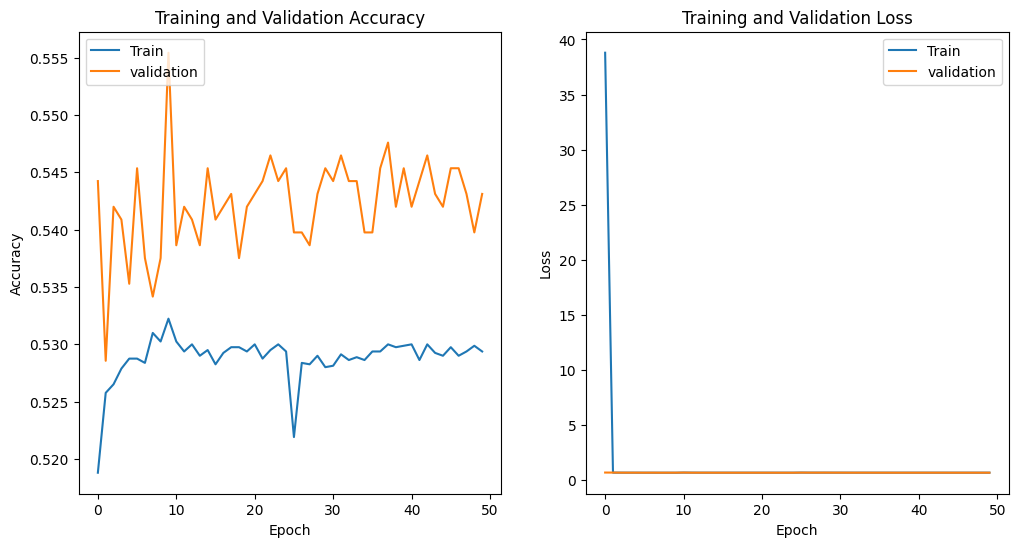

In [34]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'validation'], loc = 'upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'validation'], loc = 'upper right')
plt.show()

